In [63]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np

def loadData(fileName):
    print("Loading data file")
    with open(fileName, "rb") as f:
        data = pickle.load(f)
    #except:
    #    raise(IOError("Data file: " + fileName + " not in valid pickle format"))
    print("Data file loaded")
    return data
        
            
class dataEpoch(object):
    def __init__(self, targetSeq, logitSeq, epochNum):
        self.targetSeq = targetSeq
        self.logitSeq = logitSeq
        self.epochNum = epochNum
        self.endoFeatures = endoFeatures
        self.targetAtt = targetAtt
        self.modelType = model
        self.lossType = lossType
        self.trainValTestSplit = trainValTestSplit
        self.modelRunIdentifier = modelRunIdentifier
        
def transformData(data, sequenceLength=500, scalingFactor=1):
    predictionsList = data.logitSeq
    targetsList = data.targetSeq
    
    numRows = int(len(predictionsList)/500)
    predictionsByWorkout = np.zeros((numRows, sequenceLength))
    targetsByWorkout = np.zeros((numRows, sequenceLength))
    #Now transform the lists into n x 500 arrays
    for i in range(numRows):
        predictionsByWorkout[i,:] = predictionsList[i*sequenceLength : (i+1)*sequenceLength]
        targetsByWorkout[i,:] = targetsList[i*sequenceLength : (i+1)*sequenceLength]
    
    return (predictionsByWorkout*scalingFactor, targetsByWorkout*scalingFactor)

def plotPerformance(data, plotTitle=None, plotErrorBars=False):
    predictionsByWorkout, targetsByWorkout = transformData(data, scalingFactor=250)
    residuals = predictionsByWorkout-targetsByWorkout
    #Compute the means and standard deviations of the residuals
    means = residuals.mean(0)
    stds = residuals.std(0)
    indices=np.array(range(len(means)))
    #Plot the mean exercise sequence with error bars representing the standard deviation
    fig = plt.figure()
    if plotErrorBars:
        plt.errorbar(indices, means, yerr=stds)
    else:
        plt.plot(indices, means)
        
    #Label the plot with the epoch number, the model type, the error measure, and the data variables
    if plotTitle is None:
        mt = data.modelType
        lt = data.lossType
        ef = str(data.endoFeatures)
        en = str(data.epochNum)
        plt.title(mt + ", " + lt + ", " + ef + ", epoch:" + en)
    else:
        plt.title(plotTitle)
    MAE=np.mean(abs(means))
    fig.suptitle("Mean absolute error: " + str(MAE))
    plt.show()


In [2]:
#data = loadData('logs/fullData/12_30PM_October_26_2016_epoch_10')
data = loadData('logs/fullData/03_36PM_October_26_2016_epoch_10')

Loading data file
Data file loaded


In [16]:
dataByWorkout=transformData(data)

NameError: global name 'dataByWorkout' is not defined

In [49]:
np.shape(data.targetSeq)

(506, 500, 1)

In [50]:
np.shape(data.logitSeq)

(253000, 1)

In [48]:
np.shape(data.inputSeq)

(12650, 20, 1160)

In [26]:
dataNew = loadData('logs/fullData/02_05PM_October_29_2016_epoch_1')

Loading data file
Data file loaded


In [45]:
np.shape(dataNew.targetSeq)

(506, 500, 1)

In [28]:
dataNew.logitSeq[0][0:2]

array([ 17.69545364], dtype=float32)

In [46]:
np.shape(dataNew.outputsSeq)

(12650, 20, 200)

In [47]:
np.shape(dataNew.outputSeq)

(253000, 200)

In [2]:
import numpy as np

In [51]:
12650*20

253000

In [52]:
506*500

253000

In [9]:
#dataNewNew = loadData('logs/fullData/02_50PM_October_29_2016_epoch_4')
#dataNewNew = loadData('logs/fullData/03_03PM_October_29_2016_epoch_10')
#dataNewNew = loadData('logs/fullData/03_39PM_October_29_2016_epoch_14')
#dataNewNew = loadData('logs/fullData/03_39PM_October_29_2016_epoch_39')
dataNewNew = loadData('logs/fullData/05_36PM_October_29_2016_epoch_39')

Loading data file
Data file loaded


In [6]:
print("Target shape: " + str(np.shape(dataNewNew.targetSeq)))
print("Logit shape: " + str(np.shape(dataNewNew.logitSeq)))

Target shape: (252700, 1)
Logit shape: (252700, 1)


In [7]:
dataNewNew.targetSeq[0:99]

[array([ 0.25600001], dtype=float32),
 array([ 0.28], dtype=float32),
 array([ 0.28], dtype=float32),
 array([ 0.28400001], dtype=float32),
 array([ 0.26800001], dtype=float32),
 array([ 0.26800001], dtype=float32),
 array([ 0.31600001], dtype=float32),
 array([ 0.37200001], dtype=float32),
 array([ 0.38800001], dtype=float32),
 array([ 0.412], dtype=float32),
 array([ 0.43200001], dtype=float32),
 array([ 0.44800001], dtype=float32),
 array([ 0.456], dtype=float32),
 array([ 0.46799999], dtype=float32),
 array([ 0.46799999], dtype=float32),
 array([ 0.46799999], dtype=float32),
 array([ 0.472], dtype=float32),
 array([ 0.47600001], dtype=float32),
 array([ 0.484], dtype=float32),
 array([ 0.48800001], dtype=float32),
 array([ 0.50400001], dtype=float32),
 array([ 0.51999998], dtype=float32),
 array([ 0.53200001], dtype=float32),
 array([ 0.54400003], dtype=float32),
 array([ 0.54400003], dtype=float32),
 array([ 0.54000002], dtype=float32),
 array([ 0.53600001], dtype=float32),
 array

In [8]:
dataNewNew.logitSeq[0:99]

[array([ 0.58337796], dtype=float32),
 array([ 0.53646022], dtype=float32),
 array([ 0.52995723], dtype=float32),
 array([ 0.53987437], dtype=float32),
 array([ 0.55160999], dtype=float32),
 array([ 0.56161928], dtype=float32),
 array([ 0.56797957], dtype=float32),
 array([ 0.57226861], dtype=float32),
 array([ 0.57514852], dtype=float32),
 array([ 0.57728016], dtype=float32),
 array([ 0.57867318], dtype=float32),
 array([ 0.57969999], dtype=float32),
 array([ 0.58051699], dtype=float32),
 array([ 0.58128715], dtype=float32),
 array([ 0.58183837], dtype=float32),
 array([ 0.58222926], dtype=float32),
 array([ 0.58249503], dtype=float32),
 array([ 0.5827018], dtype=float32),
 array([ 0.58282876], dtype=float32),
 array([ 0.58291495], dtype=float32),
 array([ 0.58297545], dtype=float32),
 array([ 0.58302152], dtype=float32),
 array([ 0.58305109], dtype=float32),
 array([ 0.58307028], dtype=float32),
 array([ 0.58308214], dtype=float32),
 array([ 0.58308893], dtype=float32),
 array([ 0.58

In [10]:
(np.array(dataNewNew.logitSeq[1100:1299])-np.array(dataNewNew.targetSeq[1100:1299]))*250


array([[  4.79778671],
       [  4.79315233],
       [  4.78863716],
       [  3.7843883 ],
       [  3.78040981],
       [  3.77674389],
       [  4.77331877],
       [  7.77015114],
       [  8.76720238],
       [  9.76435852],
       [ 10.76155853],
       [ 11.75883389],
       [ 11.75622654],
       [ 11.75370789],
       [ 11.75123405],
       [  9.74889088],
       [  8.74668312],
       [  7.7445507 ],
       [  6.74250698],
       [  5.74053812],
       [  3.91477346],
       [  1.90266967],
       [  2.89753079],
       [  2.89453554],
       [  2.89225578],
       [  2.89051247],
       [  4.88922024],
       [  4.8877449 ],
       [  5.88625669],
       [  6.88478374],
       [  6.88335323],
       [  7.8820734 ],
       [  7.88080692],
       [  7.87970448],
       [  7.87851238],
       [  7.8774395 ],
       [  6.87643909],
       [  5.87543869],
       [  4.87445307],
       [  2.87371874],
       [  1.87288225],
       [  0.87210536],
       [ -1.12861395],
       [ -2

In [1]:
int(1.99)

1

In [7]:
test=np.array([[1,2,3,4],[2,3,4,5]])
test.std(0)

array([ 0.5,  0.5,  0.5,  0.5])

In [6]:
test

array([[1, 2, 3, 4],
       [2, 3, 4, 5]])

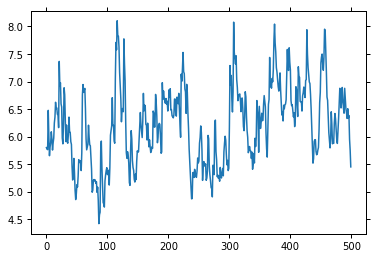

In [43]:
#plotPerformance(dataNewNew)
data=dataNewNew
predictionsByWorkout, targetsByWorkout = transformData(data, scalingFactor=250)
residuals = predictionsByWorkout-targetsByWorkout
#Compute the means and standard deviations of the residuals
means = residuals.mean(0)
stds = residuals.std(0)
indices=np.array(range(len(means)))
#Plot the mean exercise sequence with error bars representing the standard deviation
plt.figure()
plt.errorbar(indices, means, yerr=stds)
#plt.plot([1,2,3],[1,1,1])
plt.show()

In [58]:
dataWithSport = loadData('logs/fullData/05_36PM_October_29_2016_epoch_40')
dataWithoutSport = loadData('logs/fullData/10_45PM_October_30_2016_epoch_40')

Loading data file
Data file loaded
Loading data file
Data file loaded


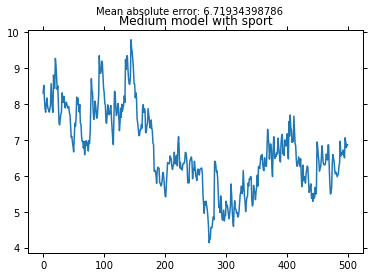

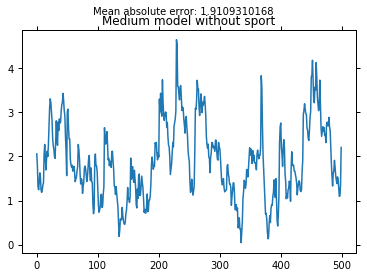

In [59]:
plotPerformance(dataWithSport, plotTitle="Medium model with sport")
plotPerformance(dataWithoutSport, plotTitle="Medium model without sport")

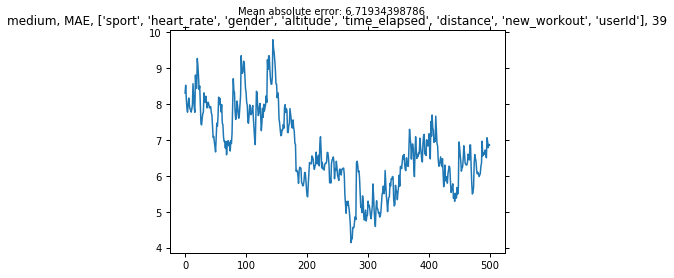

In [62]:
plotPerformance(dataWithSport)